In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = '/content/PJ1_Cleaned CSV - results-survey110205.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
cop=data.copy()

5     2.688889
9     2.466667
11    2.311111
12    1.511111
16    1.755556
Name: Average_Sustainability_Rating, dtype: float64 0    3.488889
1    2.244444
2    1.511111
3    2.227273
7    1.088889
Name: Average_Sustainability_Rating, dtype: float64 46    1.4
Name: Average_Sustainability_Rating, dtype: float64
DEM04SEX. What gender do you identify as?Please select.
Female    2.089938
Male      2.265284
Other     1.400000
Name: Average_Sustainability_Rating, dtype: float64


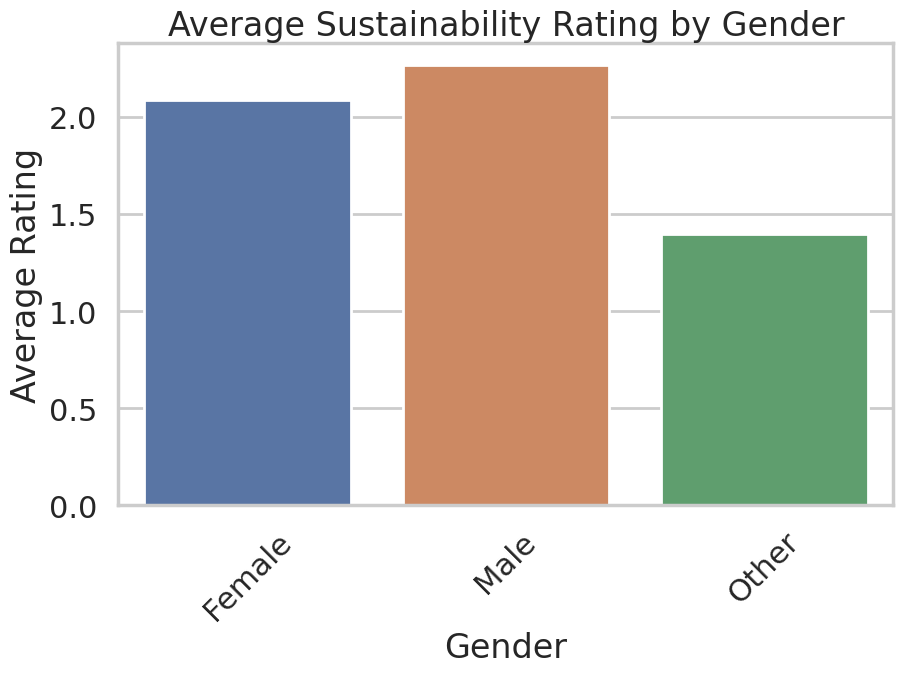

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for analysis

# Identifying columns for sustainability ratings, gender, and employment status
sustainability_columns = [col for col in data.columns if 'Eco-friendly' in col]
gender_column = 'DEM04SEX. What gender do you identify as?Please select.'

sustainability_columns = [col for col in data.columns if 'Eco-friendly' in col]

# Calculate the average sustainability rating
data['Average_Sustainability_Rating'] = data[sustainability_columns].mean(axis=1)

# Extract ratings for each gender
male_ratings = data[data[gender_column] == 'Male']['Average_Sustainability_Rating'].dropna()
female_ratings = data[data[gender_column] == 'Female']['Average_Sustainability_Rating'].dropna()
other_ratings = data[data[gender_column] == 'Other']['Average_Sustainability_Rating'].dropna()

# Display first few entries of each gender category for verification
print(male_ratings.head(), female_ratings.head(), other_ratings.head())

gender_sustainability = data.groupby(gender_column)['Average_Sustainability_Rating'].mean()

print(gender_sustainability)

# Plots

sns.set(style="whitegrid")
sns.set_context('poster')
# Plot 1: Gender and Sustainability Ratings
plt.figure(figsize=(10, 6))
gender_sustainability_plot = sns.barplot(x=gender_sustainability.index, y=gender_sustainability.values)
plt.title('Average Sustainability Rating by Gender')
plt.ylabel('Average Rating')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from scipy.stats import kruskal

# Filter the data for non-null responses and for each gender category
male_ratings = data.loc[data[gender_column] == 'Male', 'Average_Sustainability_Rating'].dropna()
female_ratings = data.loc[data[gender_column] == 'Female', 'Average_Sustainability_Rating'].dropna()
other_ratings = data.loc[data[gender_column] == 'Other', 'Average_Sustainability_Rating'].dropna()

# Perform the Kruskal-Wallis H test
h_stat, p_value = kruskal(male_ratings, female_ratings, other_ratings)

# Display the results
print(f"H-statistic: {h_stat}")
print(f"P-value: {p_value}")

H-statistic: 2.4742465137202116
P-value: 0.290217900573261


In [ ]:
data.drop(columns=data.columns[46:],axis=0,inplace=True)
data.dropna(inplace=True)\
#data.fillna(method='bfill',axis=0)

# Demographics
#TODO


Q. Is there a significant difference in how males and females view products sustainably?

Q. Is there a difference in how people from different backgrounds view products as sustainable?

Q. How does the continent type influence the Products sustainability rating?

In [ ]:
eco_friendly_columns=data.columns[1:]
color_ratings_corrected = {color: pd.Series(dtype='float') for color in set([col[:3] for col in eco_friendly_columns])}

for col in eco_friendly_columns:
    color = col[:3]  # Extracting the color code from the column name
    color_ratings_corrected[color] = color_ratings_corrected[color].add(data[col], fill_value=0)

# Calculating average ratings for each color
for color in color_ratings_corrected:
    num_regions = len([1 for col in eco_friendly_columns if col.startswith(color)])
    color_ratings_corrected[color] /= num_regions # Number of unique product per regions.

# Creating a DataFrame for the average ratings
average_ratings_df = pd.DataFrame(color_ratings_corrected)

# Displaying the first few rows of the average ratings DataFrame
average_ratings_df.head()


,PRP,ORG,GRN,BLU,PNK
0,3.444444,3.666667,3.444444,3.444444,3.444444
1,2.222222,2.000000,2.111111,2.222222,2.666667
2,1.777778,1.444444,1.777778,1.222222,1.333333
5,2.444444,1.111111,3.333333,3.444444,3.111111
7,0.888889,1.111111,1.444444,1.111111,0.888889


Ignore this: Regression isn't really valid at the moment since I have very few data-points however good for the Future

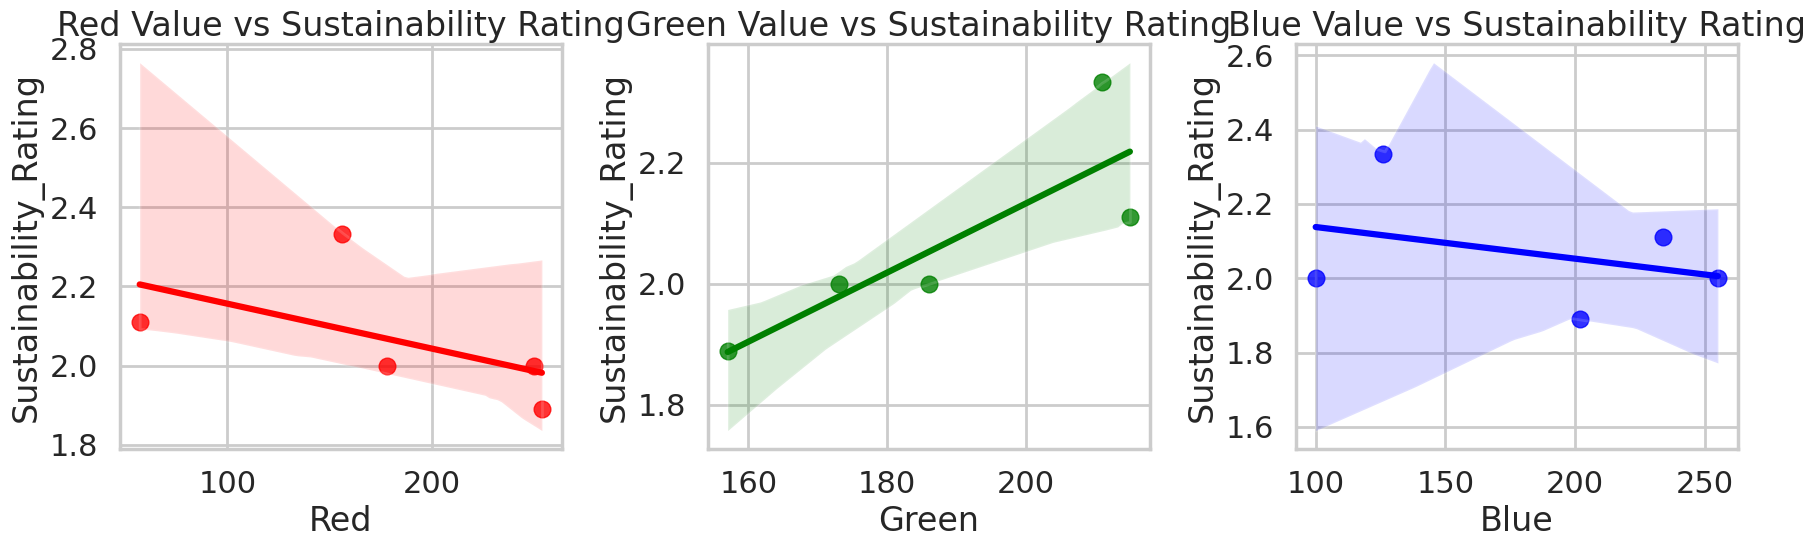

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Prepare the data for linear regression plots
# Extracting individual RGB components and sustainability ratings into a DataFrame
rgb_values = {'GRN': [156, 211, 126], 'BLU': [57, 215, 234], 'PRP': [178, 186, 255],
              'PNK': [254, 157, 202], 'ORG': [250, 173, 100]}

avg_ratings=average_ratings_df.median().to_dict()
df = pd.DataFrame({
    'Red': [rgb[0] for rgb in rgb_values.values()],
    'Green': [rgb[1] for rgb in rgb_values.values()],
    'Blue': [rgb[2] for rgb in rgb_values.values()],
    'Sustainability_Rating': [avg_ratings[color] for color in rgb_values.keys()]
})

# Creating linear regression plots
plt.figure(figsize=(18, 6))

# Red Value vs Sustainability Rating
plt.subplot(1, 3, 1)
sns.regplot(x='Red', y='Sustainability_Rating', data=df, color='red')
plt.title('Red Value vs Sustainability Rating')
# Green Value vs Sustainability Rating
plt.subplot(1, 3, 2)
sns.regplot(x='Green', y='Sustainability_Rating', data=df, color='green')
plt.title('Green Value vs Sustainability Rating')
# Blue Value vs Sustainability Rating
plt.subplot(1, 3, 3)
sns.regplot(x='Blue', y='Sustainability_Rating', data=df, color='blue')
plt.title('Blue Value vs Sustainability Rating')

plt.tight_layout()
plt.show()



     Red  Green  Blue  Sustainability Rating
GRN  156    211   126               2.333333
BLU   57    215   234               2.111111
PRP  178    186   255               2.000000
PNK  254    157   202               1.888889
ORG  250    173   100               2.000000


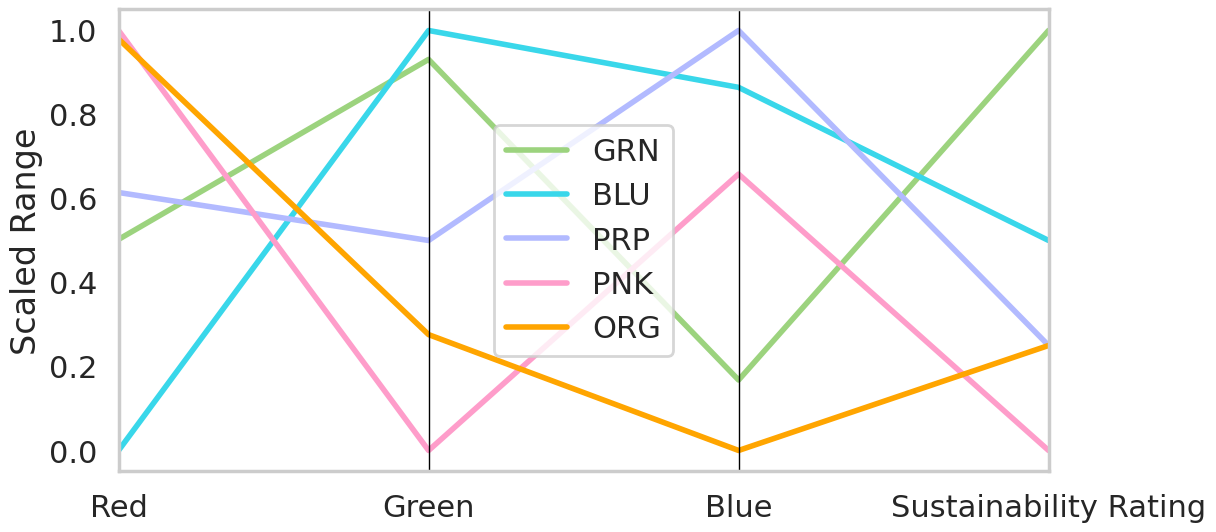

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from pandas.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt

sns.set_context("poster")
# RGB values and average sustainability ratings
rgb_values = {'GRN': [156, 211, 126], 'BLU': [57, 215, 234], 'PRP': [178, 186, 255],
              'PNK': [254, 157, 202], 'ORG': [250, 173, 100]}
avg_ratings = average_ratings_df.median().to_dict()

# Creating a DataFrame from the data
data = pd.DataFrame(rgb_values).transpose()
data.columns = ['Red', 'Green', 'Blue']
data['Sustainability Rating'] = [avg_ratings[color] for color in data.index]
print(data)
# Applying  Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
scaled_df.reset_index(inplace=True)
scaled_df.rename(columns={'index': 'Color'}, inplace=True)

# Define the color map for the plot
color_map = {'PNK': "#FE9DCA", "PRP": "#B2BAFF", "ORG": "orange", "BLU": "#39D7EA", "GRN": "#9CD37E"}
colors = [color_map[color] for color in scaled_df['Color']]

# Creating the parallel coordinates plot with the specified color map
plt.figure(figsize=(12, 6))
parallel_coordinates(scaled_df, 'Color', color=colors, linewidth=4)
#plt.title('Parallel Coordinates Plot for Standardized RGB Values and Sustainability Ratings')
#plt.xlabel('Attributes')
plt.ylabel('Scaled Range')
plt.legend(loc='center')
#plt.legend(loc='center',labels=['Pistachio','Robin Egg Blue','Periwinkle','Carnation Pink','Sandy Brown'])
plt.show()


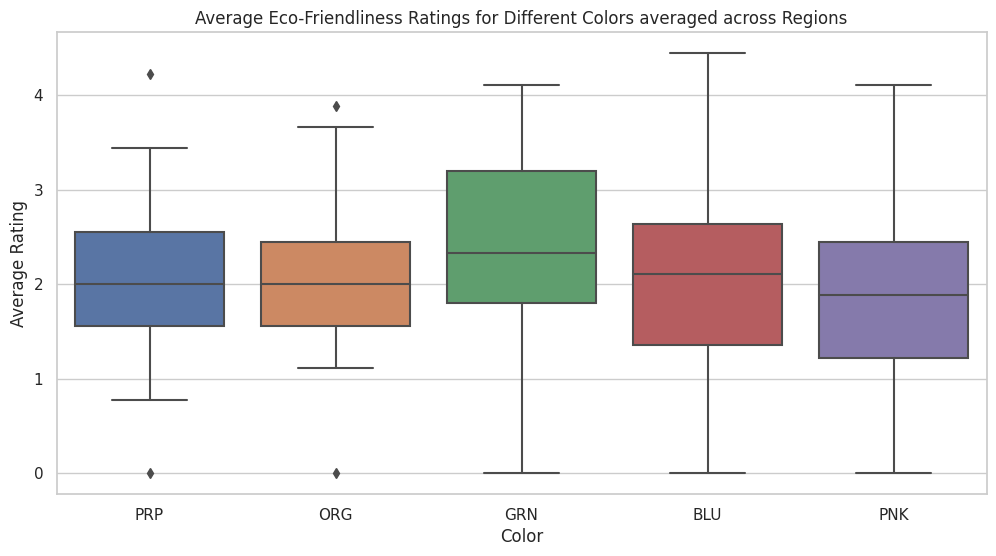

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Setting the style for the plots
sns.set(style="whitegrid")
# Plotting the average ratings for each color
plt.figure(figsize=(12, 6))
sns.boxplot(data=average_ratings_df)
plt.title('Average Eco-Friendliness Ratings for Different Colors averaged across Regions')
plt.ylabel('Average Rating')
plt.xlabel('Color')
plt.show()


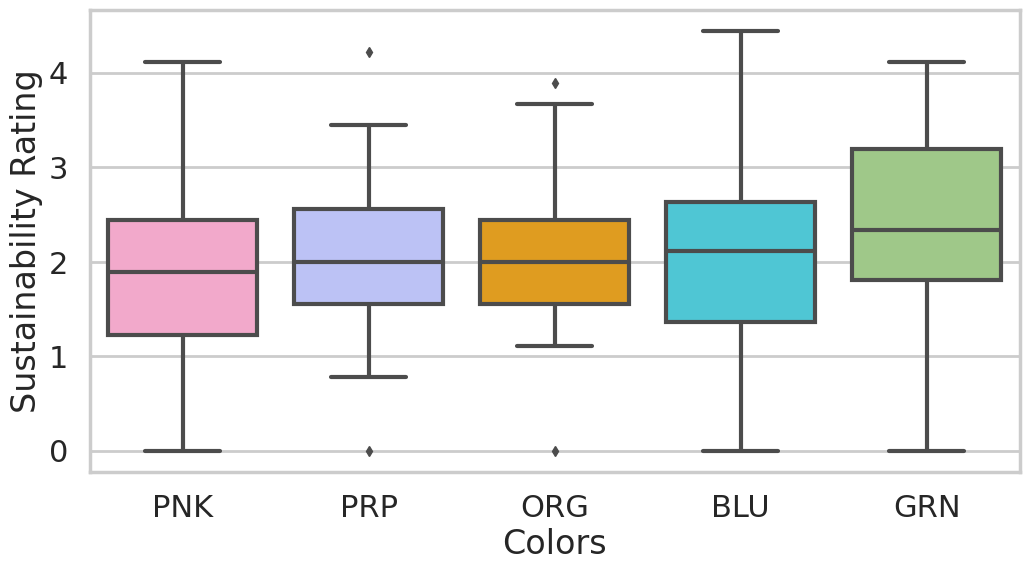

PNK    1.888889
PRP    2.000000
ORG    2.000000
BLU    2.111111
GRN    2.333333
dtype: float64


In [ ]:
#color_map = {'PNK': "pink", "PRP": "purple", "ORG": "orange", "BLU": "blue", "GRN": "green"}
color_map = {'PNK': "#FE9DCA", "PRP": "#B2BAFF", "ORG": "orange", "BLU": "#39D7EA", "GRN": "#9CD37E"}


# Setting the style for the plots
sns.set(style="whitegrid")
sns.set_context("poster")

# Plotting the average ratings for each color
plt.figure(figsize=(12, 6))

#Visualize boxplots based on Median Order
meds = average_ratings_df.median()
meds.sort_values(ascending=True, inplace=True)
average_ratings_df_sorted=average_ratings_df[meds.index]
# Ensure the color map matches the DataFrame columns
palette = [color_map[col] if col in color_map else "gray" for col in average_ratings_df_sorted.columns]
#df2.boxplot()
sns.boxplot(data=average_ratings_df_sorted, palette=palette)
#plt.title('Eco-Friendliness Ratings for Different Colors Averaged Across Unique Product-Colors')
plt.ylabel('Sustainability Rating')
plt.xlabel('Colors')
#plt.xticks(sorted(np.arange(5),reverse=True),['Pistachio','Robin Egg Blue','Sandy Brown','Periwinkle','Carnation Pink'])
plt.show()
print(meds)

In [ ]:
average_ratings_df.quantile([0.25, 0.75])

,PRP,ORG,GRN,BLU,PNK
0.25,1.555556,1.555556,1.805556,1.361111,1.222222
0.75,2.555556,2.444444,3.194444,2.638889,2.444444


# Testing Colours for Significance

We do not assume anything about our data-dstribution hence we use a non-parametric test Kruskal-Wallis. We test for $p<0.05$.


$H1_{0}$: There is NO difference in perceived Sustainability in diff. colours.



In [ ]:
# Performing the Kruskal-Wallis H-test on the cleaned data
from scipy.stats import kruskal
#data.dropna(inplace=True)
kruskal_result_cleaned = kruskal(*[data[col] for col in data.columns])

print(kruskal_result_cleaned)


KruskalResult(statistic=10.73378480060196, pvalue=0.013256042280643629)


Since $0.029<0.05$ we REJECT our Null Hypothesis of $H1_0$


In [ ]:
kruskal(*[average_ratings_df[col] for col in average_ratings_df.columns])

KruskalResult(statistic=10.771742322576475, pvalue=0.029252704665541706)

Many participants mentioned that Brown was also one of those colours which they associated with Sustainability. However, in the Box-plots we see the Medians of PRP and BLU are similar. Let's test them out for a $95\%$ Confidence Interval.



$H2_{0}$: There is NO difference in perceived Sustainability between Sandy-Brown & Purple.




We notice no Significant difference since $p>0.05$ hence we REJECT our Null-Hypothesis $H2_0$


In [ ]:
kruskal(average_ratings_df['ORG'],average_ratings_df['PRP'])

KruskalResult(statistic=0.0666360267850997, pvalue=0.7962992098923511)

What do we learn from this?

We notice that the 1st,2nd Colours have a high Blue and Green values respectively. If we look at RGB value of Purple It has a high Blue and Green value, Low Reds:  $RGB(178,186,255)$ and Orange has $RGB(250,173,100)$

We notice extreme values of $Red$ combined low values of $Blue,Green$ consistently show low Sustainability perception scores.(Pink, Sandy Brown).

i.e our results of $Red$ and $Green$ being highly perceptible also apply across colour combinations containing consitituent quantities of $Red$ and $Green$

What if we merged the two colours resulting in a new colour and then tested our results?

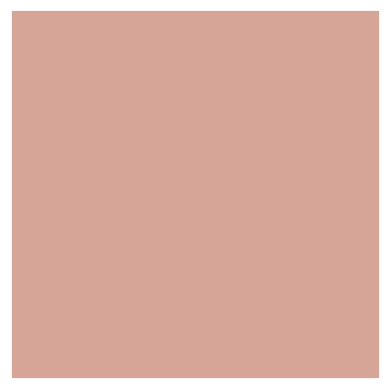

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the color in RGB format (values between 0 and 255)
color_rgb = (214/255, 165/255, 151/255)  # Converting to range [0, 1]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a square patch with the specified color
square = patches.Rectangle((0, 0), 1, 1, facecolor=color_rgb)

# Add the square patch to the axis
ax.add_patch(square)

# Set aspect of the plot to be equal
ax.set_aspect('equal', adjustable='box')

# Remove axis labels and ticks
ax.axis('off')

# Show the plot
plt.show()


This new colour does resemble colour found in Wood, Peaches,Sand,etc.

<ipython-input-16-cddb9e14133e>:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Average_Score'] = data.mean(axis=1)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


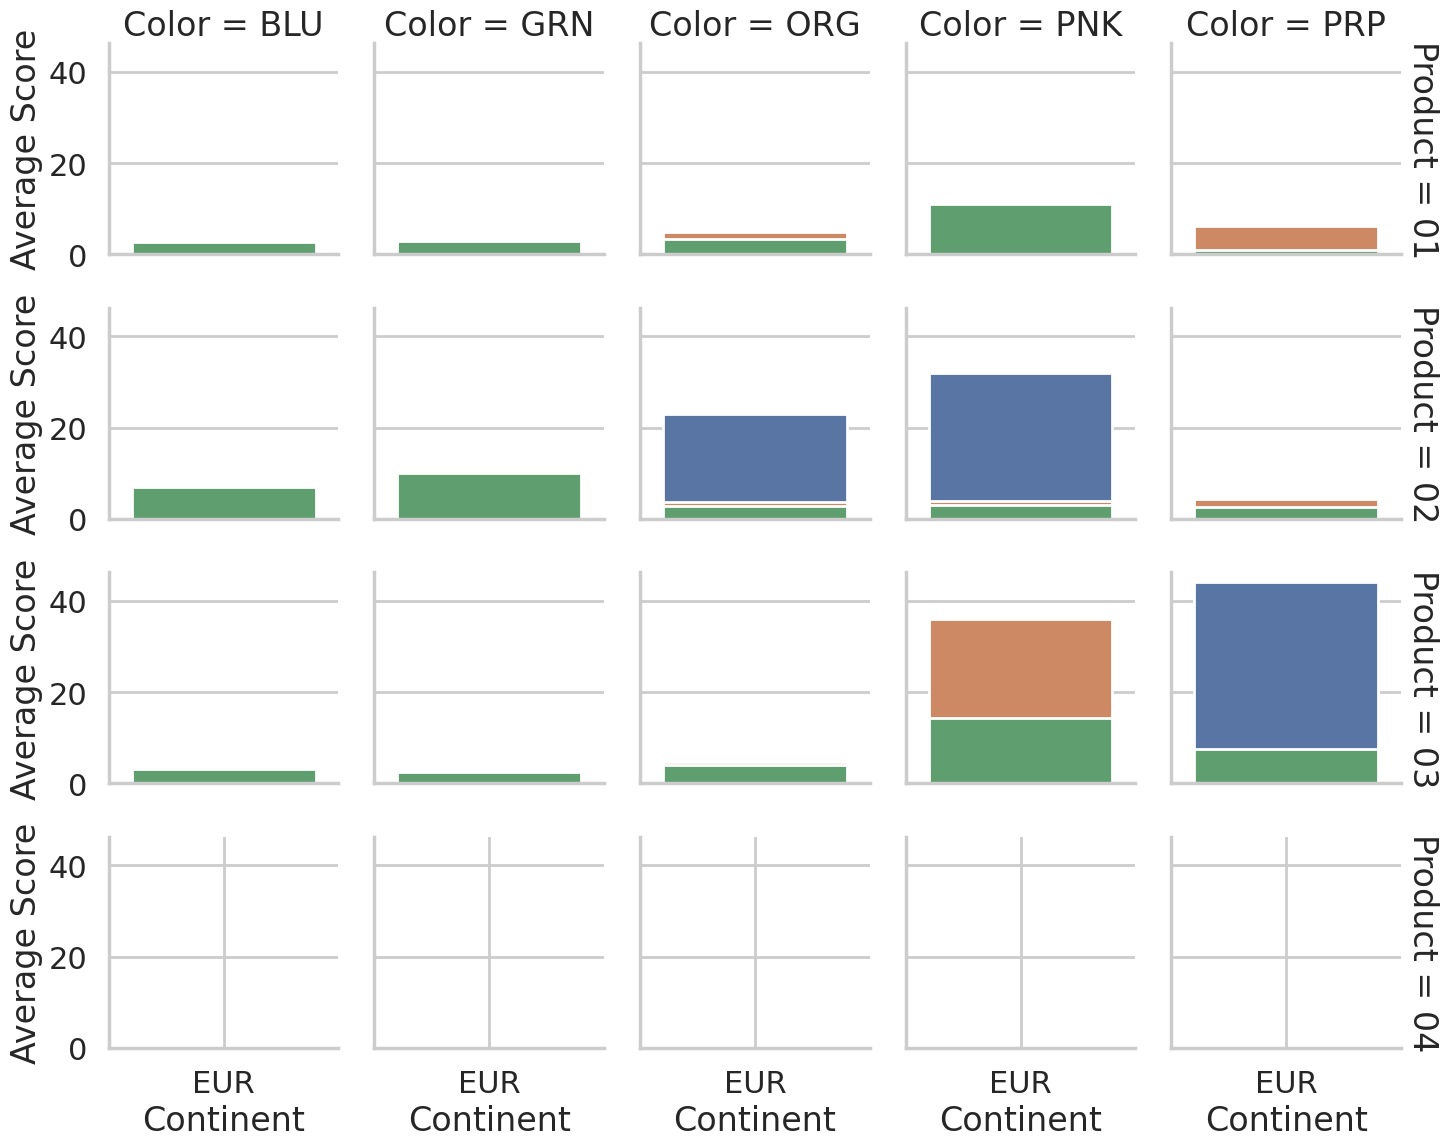

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
# Load the dataset
file_path = '/content/PJ1_Cleaned CSV - results-survey110205.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
cop=data.copy()
#data.drop(columns=data.columns[46:],axis=0,inplace=True)
#data.dropna(inplace=True)
# Assuming columns are named with color, product, and continent codes
# Example: 'GRN01EUR' for Green color, product 01, and Europe
# You would need to extract these pieces of information into separate columns
data['Color'] = data.columns.str.extract('(GRN|BLU|PRP|PNK|ORG)')
data['Product'] = data.columns.str.extract('(\d{2})')  # Adjust regex to match product code format
data['Continent'] = data.columns.str.extract('(EUR|ASI|AFR)')  # Adjust regex to match continent code format

# Calculate the average score
data['Average_Score'] = data.mean(axis=1)

# Create a FacetGrid to make a grid of plots for each Color, Product, and Continent combination
g = sns.FacetGrid(data, col='Color', row='Product', hue='Continent', margin_titles=True)
g.map(sns.barplot, 'Continent', 'Average_Score')

# Adjust the axis labels and plot titles as needed
g.set_axis_labels('Continent', 'Average Score')
g.set_titles(col_template='Color = {col_name}', row_template='Product = {row_name}')

plt.show()


# Product, Continent, Colour Graph

In [ ]:


column_names = data.columns

data['Color'] = data.columns.str.extract('(GRN|BLU|PRP|PNK|ORG)')
data['Product'] = data.columns.str.extract('(\d{2})')  # Adjust regex to match product code format
data['Continent'] = data.columns.str.extract('(EUR|ASI|AFR)')  # Adjust regex to match continent code format

# Filtering column names to get those related to color, continent, and product
filtered_columns = [col for col in column_names if any(color in col for color in ['ORG', 'PNK', 'PRP', 'GRN', 'BLU'])
                    and any(continent in col for continent in ['ASI', 'AFR', 'EUR'])
                    and any(product in col for product in ['01', '02', '03'])]

# Creating a subset of the data for analysis
subset_data = data[filtered_columns]

# Displaying the first few rows of the subset data
subset_data.head()

# Creating a dictionary to store the averages
averages = {}

# Calculating averages for each column
for col in subset_data.columns:
    # Removing NaN values for accurate average calculation
    valid_responses = subset_data[col].dropna()
    average_score = valid_responses.mean()
    averages[col] = average_score

# Converting the dictionary to a DataFrame for better visualization
averages_df = pd.DataFrame(list(averages.items()), columns=['Combination', 'Average Score'])

# Sorting the DataFrame by Average Score for better interpretation
sorted_averages_df = averages_df.sort_values(by='Average Score', ascending=False)

sorted_averages_df.head(10)  # Displaying the top 10 combinations


,Combination,Average Score
11,GRN01EUR. How Eco-friendly do you perceive tha...,3.203390
16,GRN03ASI. How Eco-friendly do you perceive tha...,2.883333
14,GRN02EUR. How Eco-friendly do you perceive tha...,2.877193
20,ORG01EUR. How Eco-friendly do you perceive tha...,2.785714
13,GRN02ASI. How Eco-friendly do you perceive tha...,2.762712
17,GRN03EUR. How Eco-friendly do you perceive tha...,2.650000
2,BLU01EUR. How Eco-friendly do you perceive tha...,2.648148
25,ORG03ASI. How Eco-friendly do you perceive tha...,2.637931
4,BLU02ASI. How Eco-friendly do you perceive tha...,2.616667
43,PRP03ASI. How Eco-friendly do you perceive tha...,2.593220


Run this after you run next cell


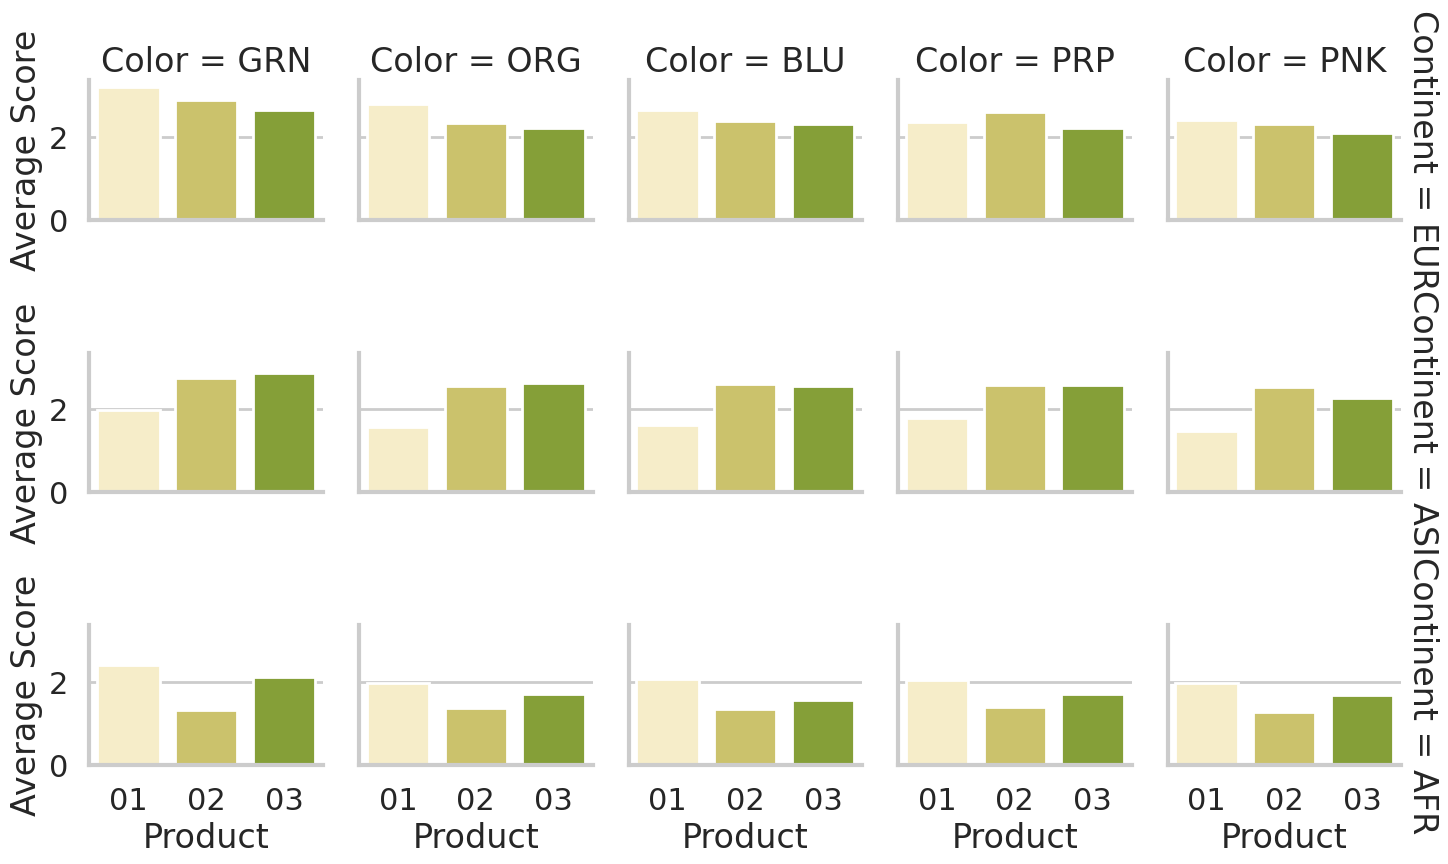

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'sorted_averages_df' is already defined and preprocessed as per your previous code.

# Defining custom color palette
enmax_palette = ["#FEF1C1", "#dbcf5c", "#8eb027"]
sns.set_palette(palette=enmax_palette)
sns.set_style("whitegrid")
sns.set_context("poster")

# Creating a FacetGrid with improved color representation
g = sns.FacetGrid(sorted_averages_df, col="Color", row="Continent", margin_titles=True, height=3)

# Creating bar plots for each facet with the new color palette
g.map(sns.barplot, "Product", "Average Score", order=["01", "02", "03"], palette=enmax_palette)

# Adjusting the layout
g.fig.subplots_adjust(top=0.9)
#g.fig.suptitle('Visualization of Eco-Friendliness Perception by Color, Product, and Continent', fontsize=16)

# Thicken the border lines by iterating over the axes
for ax in g.axes.flatten():
    for _, spine in ax.spines.items():
        spine.set_linewidth(3)  # Set the thickness here

# Displaying the plots
plt.show()


<ipython-input-20-8f5b4fca1718>:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


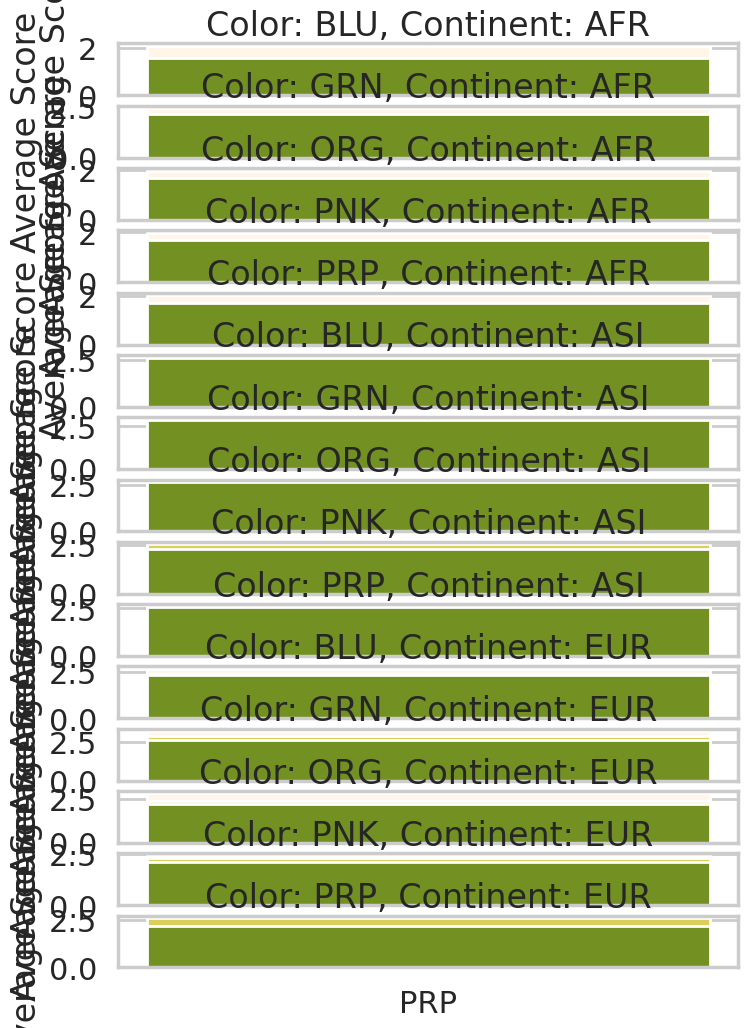

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assume 'sorted_averages_df' is your DataFrame

# Creating necessary columns from 'Combination'
split_columns = sorted_averages_df['Combination'].str.split('.', expand=True)
sorted_averages_df['Color'] = split_columns[0].str[:3]
sorted_averages_df['Product'] = split_columns[0].str[3:5]
sorted_averages_df['Continent'] = split_columns[0].str[5:8]

# Custom color palette
enmax_palette = ["#fff6e9", "#dbcf5c", "#739122"]
sns.set_palette(enmax_palette)

# Creating pivot table for stacked bar plot
pivot_df = sorted_averages_df.pivot_table(index=['Continent', 'Color'], columns='Product', values='Average Score')

# Plotting
fig, axes = plt.subplots(nrows=len(pivot_df.index), ncols=1, figsize=(8, 12))

for i, ((continent, color), row) in enumerate(pivot_df.iterrows()):
    bottom = np.zeros(len(row))
    for j, (prod, score) in enumerate(row.items()):
        axes[i].bar(color, score, bottom=bottom[j], color=enmax_palette[j])
        bottom[j] += score

    axes[i].set_title(f'Color: {color}, Continent: {continent}')
    axes[i].set_ylabel('Average Score')

plt.tight_layout()
plt.show()


# Qualitative Data


Based on your data, the reasons for associating specific colors with sustainability and eco-friendliness are as follows:

1. **Green:**
   - **Nature and Environment:** Green is predominantly associated with nature, plants, and the environment. This is evident in phrases like "Green looks like the Natur," and "Green=planet, nature, etc."
   - **Symbolism in Branding:** The longstanding use of green in eco-friendly product branding is mentioned, reflecting a societal association with 'green' movements and environmental consciousness.
   - **Innate Connection:** Some responses hint at an intrinsic, possibly evolutionary, association of green with safety and familiarity, as in historical contexts where green was prevalent in natural, safe environments.

2. **Blue:**
   - **Water and Sky:** Blue is associated with elements like sky and water. This is seen in responses like "blue and green represent sky and water," emphasizing its connection to nature.
   - **Feeling and Contextual Fit:** Blue is seen as fitting for certain products, especially those related to water, as mentioned in "blue if its fish or water related."

3. **Brown and Beige (Earthy Tones):**
   - **Natural Elements:** These colors are associated with earthy, wooden  elements found in nature. For example, responses include "Green, natural wooden colors" and "beige or earthy tones." or "wooden texture"

4. **Context-Specific Associations:**
   - **Food and Product Relevance:** Some responses indicate that the suitability of a color depends on the product type, such as green for food-related products.
.

In summary, green is most strongly associated with sustainability due to its direct representation of nature and its widespread use in environmental branding. Blue is linked to water and the sky, reinforcing its connection to natural elements. Brown and beige are considered for their natural, earthy connotations. There are also contextual factors mentioned, where the relevance of a color depends on the product type or context.



In [ ]:
qual_df=cop.loc[cop['id. Response ID'].isin(data['id. Response ID'].values.astype(list))]

In [ ]:
qual_results=qual_df[qual_df.columns[46:][1]].dropna()

In [ ]:
len(qual_results)

35

In [ ]:
for i in qual_results:
  print(i)

No
Green and Brown
I don't know. Maybe green
Green brown beige, natural colours because they are associated with nature 
I think that nature colours like green if its food related feels eco friendly and blue if its fish or water related. Just feels like thoose colours fits better
Green Like gras
Green looks like the Natur, so it might be more eco friendly :D


Green and blue
Green for bio products
Green, just for the green association to nature
blue and green represent sky and water, so this is the reason I prefer blue and green the most sustainable one.
Green
Green, natural wooden colors because that's what's found in the nature I grew up with.
Color does not influence my perception of eco friendlieness
Green=planet, nature,etc
I perceive colors that I connect with nature as eco friendly such as green, beige or earthy tones or wooden tones/textures
eco friendly products have been associated with the colour green for a long time to represent ‘green’ movements and the environment 
Pls s

In [ ]:
from collections import Counter
import re

# Provided text
text_data = """
No
Green and Brown
I don't know. Maybe green
Green brown beige, natural colors because they are associated with nature
I think that nature colors like green if its food related feels eco friendly and blue if its fish or water related. Just feels like thoose colours fits better
Green Like gras
Green looks like the Natur, so it might be more eco friendly :D

Green and blue
Green for bio products
Green, just for the green association to nature
blue and green represent sky and water, so this is the reason I prefer blue and green the most sustainable one.
Green
Green, natural wooden colors because that's what's found in the nature I grew up with.
Color does not influence my perception of eco friendlieness
Green=planet, nature,etc
I perceive colors that I connect with nature as eco friendly such as Green, beige or earthy tones or wooden tones/textures
eco friendly products have been associated with the color Green for a long time to represent ‘Green’ movements and the environment
Green
Warm colors, don't know why
Green feels kinda eco bc it's associated with nature
Green
Blue
They are related to nature’s color and they are not provoking
Green is often the color used to symbolize the environment. Green also societally means “Go” or “Good” (whereas red may tend to symbolize “Stop” or “Danger). I think this stems back from when humans were primitive and most of the things we saw in the forest was green so it was a safe colour but red was a less familiar colour. Also sustainable brands tend to have already adopted green as a symbol colour so maybe our brains just start to expect that association. As I am more active with environmental activism I am more inclined to look at specific labels on the packaging.
I feel it's more which colors appear more friendly while suiting the packaging as well makes a big difference. The combination makes it seem eco friendly. I'd say green and purple probably were the ones that most stood out to me.
We usually associate Green with plants & nature... Blue with water & purety
Green is like the eco-friendly color.
Green - Color of grass, trees.
Green
Since sustainability started to be a new trend in companies, they have added Green and Blue colors to associate them with nature and water
Green, Blue,
Colors that mainly occur in nature.
Shades of Brown, Green, etc.
Nature - Green, Blue
Pollution - Brown, orange
All colors that are warm and natural like Brown and greenish colors seem to be eco friendly.
Green
Green
"""

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

additional_stopwords = ['colour', 'color',"colours","Color","Colors" "the","I","to","and","that","a","and","or","with","they","as","am","and","etc","them","look","at","used",".","Pls","back","say","one","two","groupchaf","kinda","whereas","feel","seem","think",".","might","better","well","etc","expect","often","Go"," shit","pls","thoose","because","bc","reason","Green,", "&","-","one.",":D","me","We","we","Like","that's"]

# Create a set of stop words
stop_words = set(stopwords.words('english'))
combined_stop_words = stop_words.union(additional_stopwords)




def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in combined_stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)


filtered_sentence = remove_stop_words(text_data)
cleaned_text = re.sub(r'[^\w\s]', '', filtered_sentence.lower()).split()







['no', 'green', 'brown', 'know', 'maybe', 'green', 'green', 'brown', 'beige', 'natural', 'colors', 'associated', 'nature', 'nature', 'colors', 'like', 'green', 'food', 'related', 'feels', 'eco', 'friendly', 'blue', 'fish', 'water', 'related', 'just', 'feels', 'like', 'fits', 'green', 'gras', 'green', 'looks', 'like', 'natur', 'eco', 'friendly', 'green', 'blue', 'green', 'bio', 'products', 'green', 'association', 'nature', 'blue', 'green', 'represent', 'sky', 'water', 'prefer', 'blue', 'green', 'sustainable', 'green', 'natural', 'wooden', 'colors', 'whats', 'found', 'nature', 'grew', 'with', 'influence', 'perception', 'eco', 'friendlieness', 'greenplanet', 'natureetc', 'perceive', 'colors', 'connect', 'nature', 'eco', 'friendly', 'beige', 'earthy', 'tones', 'wooden', 'tonestextures', 'eco', 'friendly', 'products', 'associated', 'green', 'long', 'time', 'represent', 'green', 'movements', 'environment', 'green', 'warm', 'colors', 'know', 'green', 'feels', 'eco', 'associated', 'nature', 'g

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Splitting the text into words
words = filtered_sentence.split()


# Counting occurrences of each word
word_counts = Counter(words)

# Calculating total number of words
total_words = sum(word_counts.values())

# Calculating the percentage of each word
word_percentages = {word: (count / total_words) * 100 for word, count in word_counts.items()}


sorted_word_percentages = dict(sorted(word_percentages.items(), key=lambda item: item[1], reverse=True))

# Displaying the sorted word percentages
word_counts.most_common()

[('Green', 20),
 ('green', 8),
 ('colors', 8),
 ('eco', 8),
 ('nature', 7),
 ('like', 5),
 ('friendly', 5),
 ('blue', 4),
 ('Blue', 4),
 ('natural', 3),
 ('associated', 3),
 ('feels', 3),
 ('water', 3),
 ('Brown', 2),
 ('related', 2),
 ('products', 2),
 ('represent', 2),
 ('sustainable', 2),
 ('wooden', 2),
 ('symbolize', 2),
 ('red', 2),
 ('tend', 2),
 ('makes', 2),
 ('friendly.', 2),
 ('associate', 2),
 ('Brown,', 2),
 ('No', 1),
 ('know.', 1),
 ('Maybe', 1),
 ('brown', 1),
 ('beige,', 1),
 ('food', 1),
 ('fish', 1),
 ('related.', 1),
 ('Just', 1),
 ('fits', 1),
 ('gras', 1),
 ('looks', 1),
 ('Natur,', 1),
 ('bio', 1),
 ('association', 1),
 ('sky', 1),
 ('water,', 1),
 ('prefer', 1),
 ("what's", 1),
 ('found', 1),
 ('grew', 1),
 ('with.', 1),
 ('influence', 1),
 ('perception', 1),
 ('friendlieness', 1),
 ('Green=planet,', 1),
 ('nature,etc', 1),
 ('perceive', 1),
 ('connect', 1),
 ('beige', 1),
 ('earthy', 1),
 ('tones', 1),
 ('tones/textures', 1),
 ('long', 1),
 ('time', 1),
 ('‘Gre

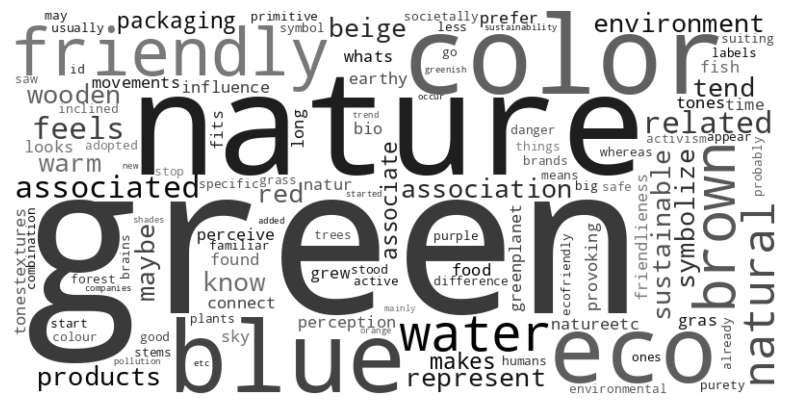

In [ ]:
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
sns.set_context("poster")
# Collating all responses into a single text for word cloud generation
combined_text = " ".join(cleaned_text)
additional_stopwords = {'colour', 'color',"colours","Color","Colors" "the","I","to","and","that","a","and","or","with","they","as","am","and","etc","them","look","at","used",".","Pls","back","say","one","two","groupchaf","kinda","whereas","feel","seem","think","associated",".","might","better","well","etc","expect","often","Go"," shit","pls","thoose","because","bc","reason"}  # Replace with words you want to remove

black_to_grey = sns.dark_palette("black", reverse=True, n_colors=5)
black_to_grey_cm = LinearSegmentedColormap.from_list("black_to_grey", ["black", "grey"], N=512)
stopwords = additional_stopwords
# Generating the word cloud
wordcloud = WordCloud(width=800, height=400,background_color='#FFF', collocations=False,colormap=black_to_grey_cm).generate(combined_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
wordcloud.words_

{'Green': 1.0,
 'nature': 0.34285714285714286,
 'colour': 0.34285714285714286,
 'eco': 0.2571428571428571,
 'friendly': 0.22857142857142856,
 'blue': 0.22857142857142856,
 'color': 0.22857142857142856,
 'brown': 0.14285714285714285,
 'water': 0.11428571428571428,
 'feel': 0.11428571428571428,
 'natural': 0.08571428571428572,
 'associated': 0.08571428571428572,
 'related': 0.08571428571428572,
 'know': 0.05714285714285714,
 'Maybe': 0.05714285714285714,
 'beige': 0.05714285714285714,
 'think': 0.05714285714285714,
 'products': 0.05714285714285714,
 'association': 0.05714285714285714,
 'represent': 0.05714285714285714,
 'sustainable': 0.05714285714285714,
 'one': 0.05714285714285714,
 'wooden': 0.05714285714285714,
 'etc': 0.05714285714285714,
 'tones': 0.05714285714285714,
 'environment': 0.05714285714285714,
 'stop': 0.05714285714285714,
 'Warm': 0.05714285714285714,
 'symbolize': 0.05714285714285714,
 'red': 0.05714285714285714,
 'tend': 0.05714285714285714,
 'look': 0.057142857142857

In [ ]:
qual_df.to_csv('Data_with_qual.csv')